In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

To explain overfitting, lets look at red wine quality dataset

In [16]:
df = pd.read_csv(r"C:\Users\raosw\projects\mlpython\data\winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


We can treat this problem either as a classification problem or as a regression
problem since wine quality is nothing but a real number between 0 and 10. For
simplicity, let’s choose classification

This dataset, however, consists of only six
types of quality values. We will thus map all quality values from 0 to 5.

In [18]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
                    4: 1,
                    5: 2,
                    6: 3,
                    7: 4,
                    8: 5
                    }

df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [22]:
df.shape

(1599, 12)

When we look at this data and consider it a classification problem, a lot of
algorithms come to our mind that we can apply to it. let’s start with something simple that we can visualize too: decision
trees.

Before we begin to understand what overfitting is, let’s divide the data into two
parts. This dataset has 1599 samples. We keep 1000 samples for training and 599
as a separate set.

In [21]:
#reshuffle the data and reset index
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
#top 1000 for training
df_train = df.head(1000)
#bottom 599 are for testing/validation
df_test = df.tail(599)

We will now train a decision tree model on the training set. For the decision tree
model

In [32]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
def fit_decision_tree(max_depth=3):
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(df_train[cols], df_train.quality)
        return clf

def accuracy_score(clf):
        train_predictions = clf.predict(df_train[cols])
        test_predictions = clf.predict(df_test[cols])
        train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
        test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
        return train_accuracy, test_accuracy

The training and test accuracy with max_depth = 3

In [33]:
clf = fit_decision_tree(max_depth=3)
print(accuracy_score(clf))

(0.584, 0.5058430717863105)


In [34]:
clf = fit_decision_tree(max_depth=7)
print(accuracy_score(clf))

(0.78, 0.5609348914858097)


Accuracies for different values of max_depth and its plot

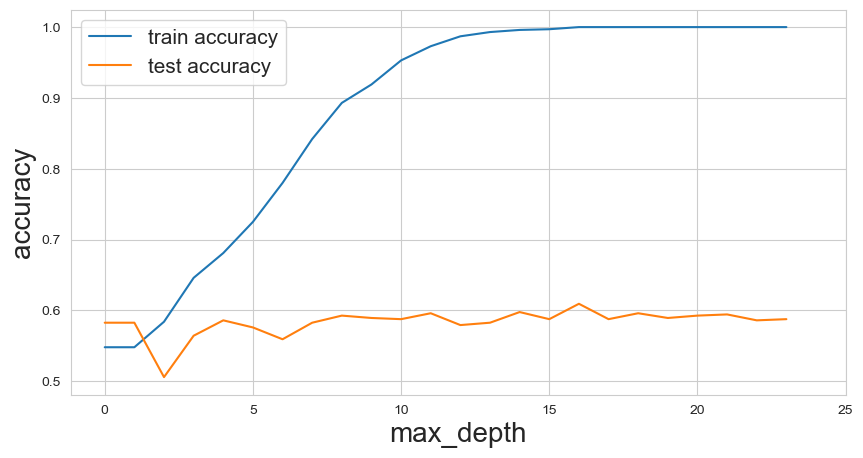

In [42]:
tr_acc, tst_acc = [], []
for md in range(1,25):
    clf = fit_decision_tree(max_depth=md)
    tr_acc.append(accuracy_score(clf)[0])
    tst_acc.append(accuracy_score(clf)[1])
# create two plots using matplotlib
# and seaborn

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(tr_acc, label="train accuracy")
plt.plot(tst_acc, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()



One might argue that this approach isn’t overfitting as the accuracy of the test set
more or less remains the same. Another definition of overfitting would be when the
test loss increases as we keep improving training loss.This is very common when
it comes to neural networks.

Whenever we train a neural network, we must monitor loss during the training time
for both training and test set. If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both
training and test set will decrease as we keep training. However, at some point, test
loss will reach its minima, and after that, it will start increasing even though training
loss decreases further. We must stop training where the validation loss reaches its
minimum value.

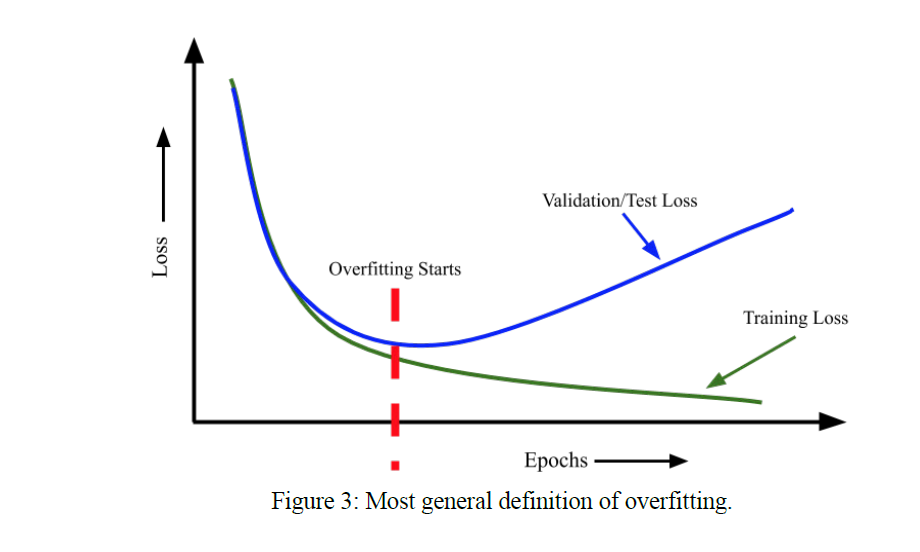

K-fold cross validation

In [43]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
    # Training data is in a CSV file called train.csv
    df = pd.read_csv(r"C:\Users\raosw\projects\mlpython\data\winequality-red.csv")
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    # save the new csv with kfold column
    df.to_csv(r"C:\Users\raosw\projects\mlpython\data\winequality_red_k_fold.csv", index=False)

In [44]:
pd.read_csv(r"C:\Users\raosw\projects\mlpython\data\winequality_red_k_fold.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.0,0.670,0.30,2.00,0.060,38.0,62.0,0.99580,3.26,0.56,10.2,6,0
1,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,0
2,7.2,0.560,0.26,2.00,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5,0
3,8.4,0.560,0.08,2.10,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5,0
4,8.0,0.580,0.28,3.20,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.6,0.665,0.10,1.50,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5,4
1595,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,4
1596,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6,5,4
1597,8.6,0.370,0.65,6.40,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5,4


In [45]:
kf.split(X=df)

<generator object _BaseKFold.split at 0x00000218041BBAC0>